In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings("ignore")
# data source - https://www.kaggle.com/datasets/yasserh/titanic-dataset/data

# EDA

In [2]:
# Loading in the dataframe and viewing the first few entries
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Checking the data types and for any missing values, as well as df length
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# Dropping unwanted columns
df = df.drop(columns=['Ticket'])

In [5]:
# Getting hex colours that match the Titanic to use in visualisations
colors = ['#34343c', '#de0727', '#ededed', '#f7cc0a']
black = '#34343c'
red = '#de0727'
white = '#ededed'
gold = '#f7cc0a'

# Pclass

In [6]:
# Checking the counts for Pclass
df.Pclass.value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

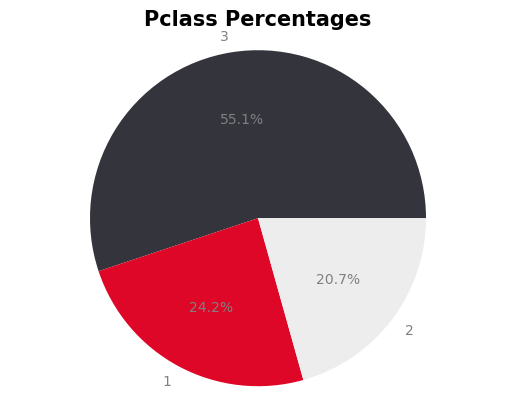

In [7]:
# Visualising the percentages of each pclass
df.Pclass.value_counts().plot(kind='pie', colors=colors, autopct='%.1f%%', textprops={'color':"grey"})
plt.title('Pclass Percentages', weight='bold', size=15)
plt.ylabel('')
plt.axis('equal')
plt.show()

In [8]:
# Creating new seperate columns for pclass, 1,2,3
df['Pclass_1'] = df['Pclass'].map({1:1, 2:0, 3:0})
df['Pclass_2'] = df['Pclass'].map({1:0, 2:1, 3:0})
df['Pclass_3'] = df['Pclass'].map({1:0, 2:0, 3:1})

# Name/Title

In [9]:
# The individual names won't be very useful, however their titles might

# Splitting the column on the ,
name_split = df.Name.str.split(',')

# Obtaining the second split 
full_name = name_split.str.get(1)

# Then splitting again on the .
title = full_name.str.split('.')

# Then obtaining the first split
person_title = title.str.get(0)

In [10]:
# Creating a new column title
df['title'] = person_title

# Stripping any whitespace in the column
df['title'] = df['title'].str.strip()

In [11]:
# Checking the different titles
df.title.value_counts()

title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [12]:
# Some entries in the title column can be categorised into another
title_dict = {'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss', 'Jonkheer':'Mr', 'Sir':'Mr', 'Don':'Mr', 'the Countess':'Miss',
             'Lady':'Mrs', 'Col':'Mr', 'Major':'Mr'}

df['title'].replace(title_dict, inplace=True)

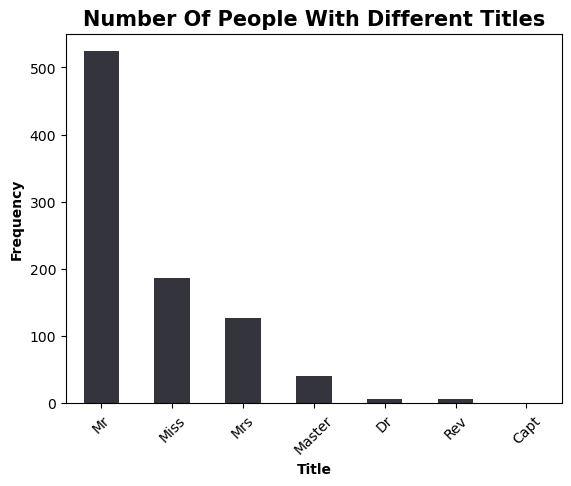

In [13]:
# Visualising the counts of different titles
df.title.value_counts().plot(kind='bar', color=black)
plt.title('Number Of People With Different Titles', weight='bold', size=15)
plt.xlabel('Title', weight='bold')
plt.ylabel('Frequency', weight='bold')
plt.xticks(rotation=45)
plt.show()

# Sex

In [14]:
# Checking the counts for Sex
df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [15]:
# Creating a new column called male that contains 1 if male and 0 if female
df['male'] = df['Sex'].map({'male':1, 'female':0})

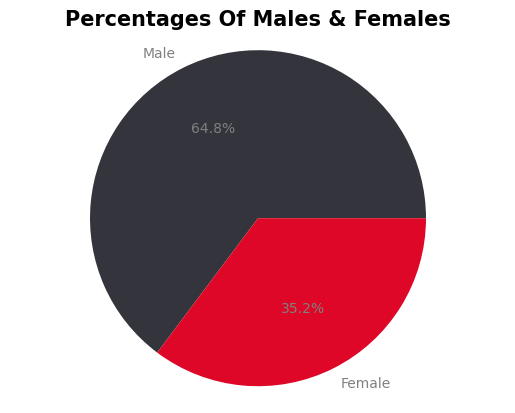

In [16]:
# Visualising the percentages of male and females
df.male.value_counts().plot(kind='pie', labels=['Male', 'Female'], colors=colors, autopct='%.1f%%', textprops={'color':'grey'})
plt.title('Percentages Of Males & Females', weight='bold', size=15)
plt.ylabel('')
plt.axis('equal')
plt.show()

# Age 

In [17]:
# Creating separate male df to find the mean age to fill in missing values
male_df = df[df['male'] == 1]
# Getting the mean age for males
male_df.Age.mean() # 31

30.72664459161148

In [18]:
# Creating separate female df to find the mean age to fill in missing values
female_df = df[df['male'] == 0]
# Getting the mean age for females
female_df.Age.mean() #28

27.915708812260537

In [19]:
# Filling in NaN values with mean age for both males and females in each of their dfs
male_df.Age.fillna(31.0, inplace=True)
female_df.Age.fillna(28.0, inplace=True)

In [20]:
# Adding both the dfs back together
df = pd.concat([male_df, female_df])

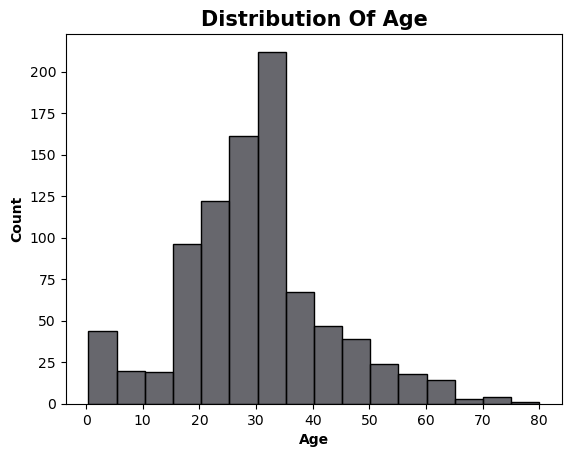

In [21]:
# Visualising the spread for the age column
sns.histplot(df.Age, bins=16, color=black)
plt.title('Distribution Of Age', weight='bold', size=15)
plt.xlabel('Age', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()

In [22]:
# Checking the stats for the age column
df.Age.describe()

count    891.000000
mean      29.779091
std       13.017438
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [23]:
# Sorting the df back by passengerid
df = df.sort_values('PassengerId', ascending=True)

# Sibsp

In [24]:
# Checking the counts for Sibsp
df.SibSp.value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

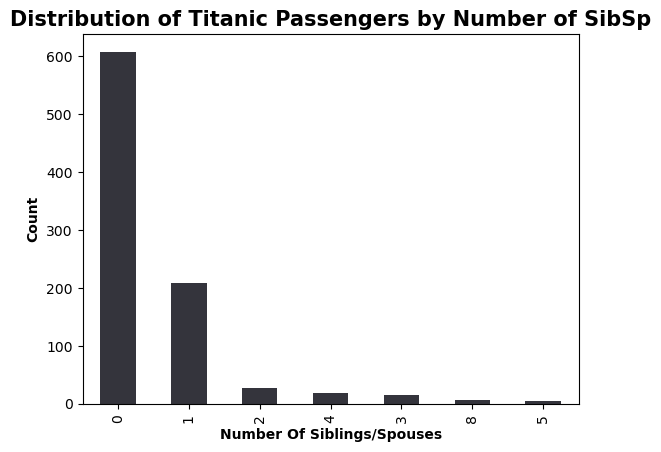

In [25]:
# Visualising the counts for the sibsp column
df.SibSp.value_counts().plot(kind='bar', color=black)
plt.title('Distribution of Titanic Passengers by Number of SibSp', weight='bold', size=15)
plt.xlabel('Number Of Siblings/Spouses', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()

# Parch

In [26]:
# Checking the counts for Parch
df.Parch.value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

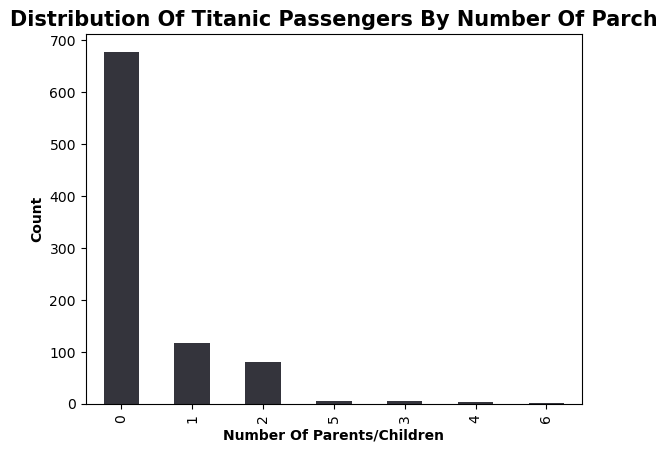

In [27]:
# Visualising the counts for the parch column
df.Parch.value_counts().plot(kind='bar', color=black)
plt.title('Distribution Of Titanic Passengers By Number Of Parch', weight='bold', size=15)
plt.xlabel('Number Of Parents/Children', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()

# Fare

In [28]:
# Checking the stats of the Fare column
df.Fare.describe()
# The column is very right skewed. The minimum is 0. This is probably relates to the crew.

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

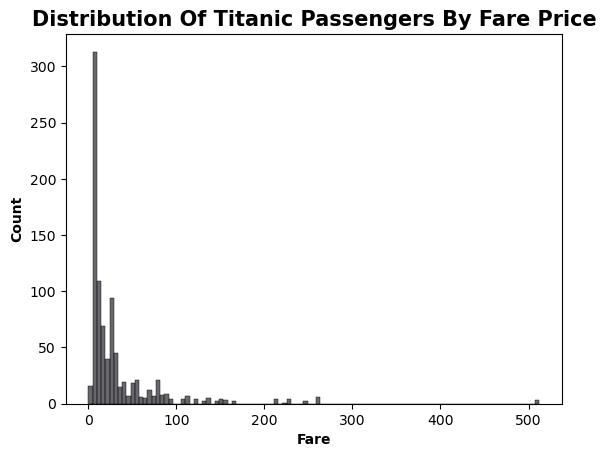

In [29]:
# Visualising the spread of the fares column
sns.histplot(df.Fare, color=black)
plt.title('Distribution Of Titanic Passengers By Fare Price', weight='bold', size=15)
plt.xlabel('Fare', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()

In [30]:
# Calculating the mean and std of the fare column
fare_std = df.Fare.std()
fare_mean = df.Fare.mean()

In [31]:
# Creating a new zscore column to see how many standard deviation each fare point is away from the mean
df['fare_zscore'] = (df['Fare'] - fare_mean) / fare_std

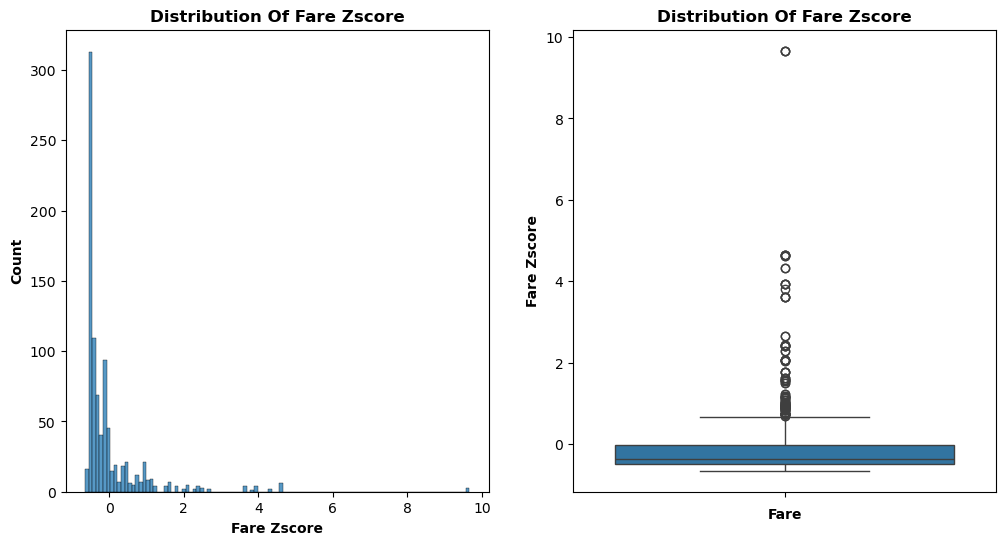

In [32]:
# Visualising the fare zscore distribution on a histogram and boxplot
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df.fare_zscore)
plt.title('Distribution Of Fare Zscore', weight='bold')
plt.xlabel('Fare Zscore', weight='bold')
plt.ylabel('Count', weight='bold')
plt.subplot(1,2,2)
sns.boxplot(df.fare_zscore)
plt.title('Distribution Of Fare Zscore', weight='bold')
plt.xlabel('Fare', weight='bold')
plt.ylabel('Fare Zscore', weight='bold')
plt.show()

In [33]:
# Removing rows of data that are more than 3 fare zscores, as they are influential outliers
df = df[df['fare_zscore'] <= 3]

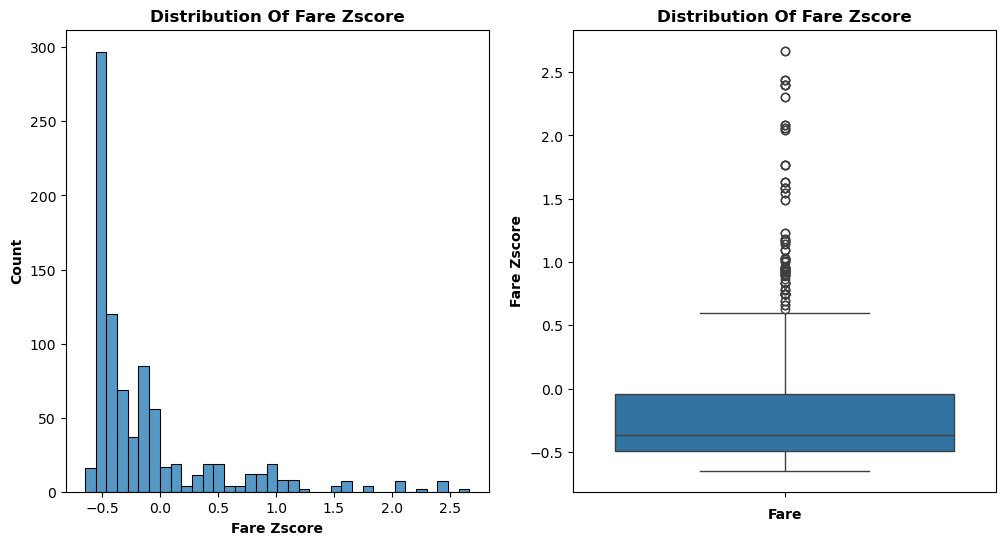

In [34]:
# Visualing the distribution of fare zscores after limiting the fare column
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(df.fare_zscore)
plt.title('Distribution Of Fare Zscore', weight='bold')
plt.xlabel('Fare Zscore', weight='bold')
plt.ylabel('Count', weight='bold')
plt.subplot(1,2,2)
sns.boxplot(df.fare_zscore)
plt.title('Distribution Of Fare Zscore', weight='bold')
plt.xlabel('Fare', weight='bold')
plt.ylabel('Fare Zscore', weight='bold')
plt.show()

In [35]:
# Checking the stats for the Fare column after reducing it
df.Fare.describe()

# The column is alot less right skewed

count    871.000000
mean      26.530170
std       29.351184
min        0.000000
25%        7.895800
50%       13.862500
75%       30.000000
max      164.866700
Name: Fare, dtype: float64

In [36]:
# Resetting the index as rows have been removed
df = df.reset_index(drop=True)

# Cabin

In [37]:
# Obtaining the first letter in the cabin value to group together areas of the ship
cabin_letter = df['Cabin'].str.get(0)

# Checking the different values
cabin_letter.value_counts()

Cabin
C    51
B    38
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [38]:
# Creating a new column cabin deck
df['cabin_deck'] = cabin_letter

In [39]:
# Creating a cabin map to turn the categorical values to numeric
cabin_map = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, 'F':6, 'G':7, 'T':8}

# Applying the map
df['cabin_deck'] = df['cabin_deck'].map(cabin_map)

In [40]:
# Getting the columns that will be used for iterative imputer
imputer_cols = df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'cabin_deck']]

# Creating an iterative imputer
imp = IterativeImputer(max_iter=10, random_state=1, missing_values=np.nan, min_value=1, max_value=8)

# Fitting and transforming the cols
imputed_cols = pd.DataFrame(imp.fit_transform(imputer_cols))

In [41]:
# Changing the cabin deck column to have the imputed values. cabin_deck=column 6
df['cabin_deck'] = imputed_cols[6]

# Rounding all the values to just be 1 number
df['cabin_deck'] = df['cabin_deck'].round()

# Changing the datatype to be int instead of float
df['cabin_deck'] = df['cabin_deck'].astype('int64')

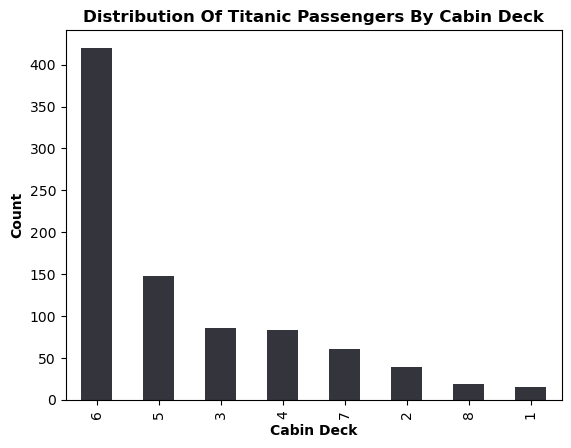

In [42]:
# Visualising the counts for cabin deck
df['cabin_deck'].value_counts().plot(kind='bar', color=black)
plt.title('Distribution Of Titanic Passengers By Cabin Deck', weight='bold')
plt.xlabel('Cabin Deck', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()

# Embarked

In [43]:
# Checking the counts for embarked column
df.Embarked.value_counts() 

Embarked
S    636
C    156
Q     77
Name: count, dtype: int64

In [44]:
# The most common response to embarked is S so I will fill in the missing values with that
df.Embarked.fillna('S', inplace=True)

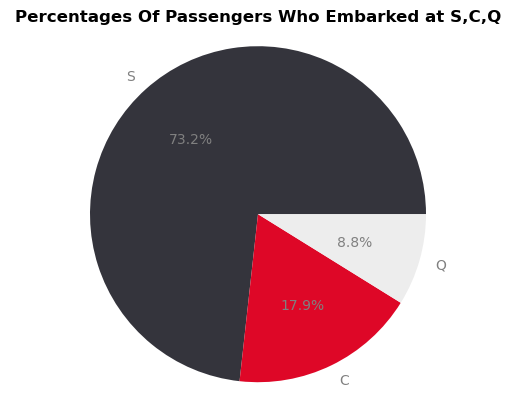

In [45]:
# Visualising the percentages of people who embarked at different locations
df.Embarked.value_counts().plot(kind='pie', colors=colors, autopct='%.1f%%', textprops={'color':'grey'})
plt.title('Percentages Of Passengers Who Embarked at S,C,Q', weight='bold')
plt.ylabel('')
plt.axis('equal')
plt.show()

In [46]:
# Creating new columns for embarked, S,Q,C
df['Embarked_s'] = df['Embarked'].map({'S':1, 'Q':0, 'C':0})
df['Embarked_q'] = df['Embarked'].map({'S':0, 'Q':1, 'C':0})
df['Embarked_c'] = df['Embarked'].map({'S':0, 'Q':0, 'C':1})

# Survived

In [47]:
# Checking the counts for who died and survived
df.Survived.value_counts()

Survived
0    543
1    328
Name: count, dtype: int64

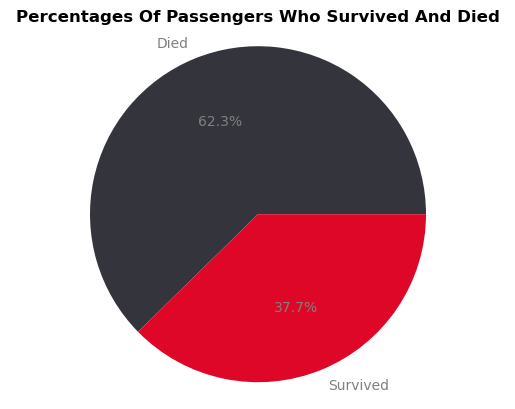

In [48]:
# Visualising the percentages of who lived and died
df.Survived.value_counts().plot(kind='pie', labels=['Died', 'Survived'], colors=colors, autopct='%.1f%%', textprops={'color':'grey'})  
plt.title('Percentages Of Passengers Who Survived And Died', weight='bold')
plt.ylabel('')
plt.axis('equal')
plt.show()

In [49]:
# Dropping unwanted columns
df = df.drop(columns=['Name', 'fare_zscore'])

# Additional Features

# Family Size

In [50]:
# Creating a new feature family size. Adding Sibsp and Parch and the original passenger
df['family_size'] = df['SibSp'] + df['Parch'] +1

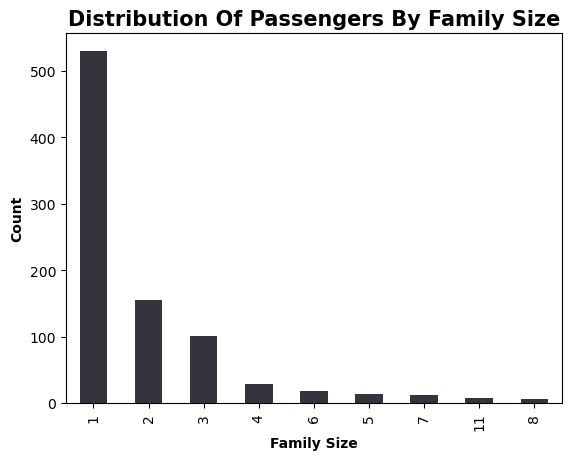

In [51]:
# Visualising the counts for family size
df['family_size'].value_counts().plot(kind='bar', color=black)
plt.title('Distribution Of Passengers By Family Size', weight='bold', size=15)
plt.xlabel('Family Size', weight='bold')
plt.ylabel('Count', weight='bold')
plt.show()

# Alone

In [52]:
# Creating a new column is alone
df['is_alone'] = df['family_size'].apply(lambda x: 1 if x == 1 else 0)

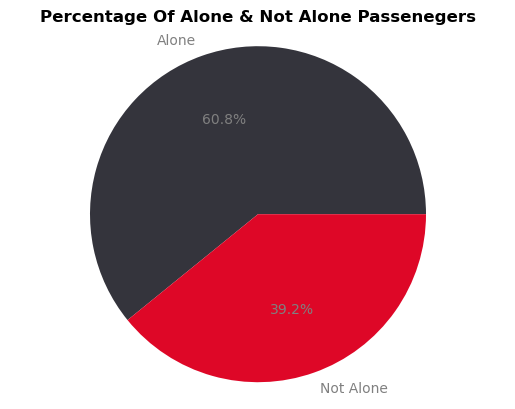

In [53]:
# Visualing the percentages of alone and not alone passengers
df['is_alone'].value_counts().plot(kind='pie', labels=['Alone', 'Not Alone'], colors=colors, autopct='%.1f%%', textprops={'color':'grey'})
plt.title('Percentage Of Alone & Not Alone Passenegers', weight='bold')
plt.ylabel('')
plt.axis('equal')
plt.show()

# Child

In [54]:
# Creating a column is child
df['is_child'] = df['Age'].apply(lambda x: 1 if x <= 16 else 0)

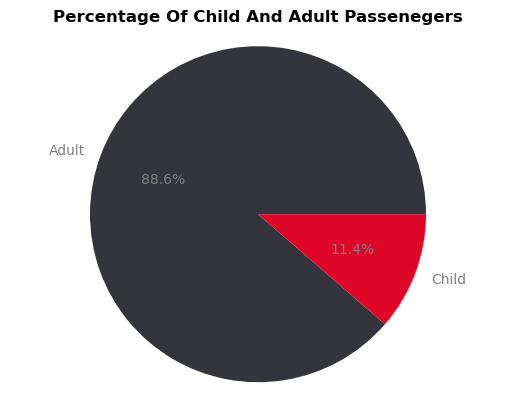

In [55]:
# Visualing the percentages of child and adults
df['is_child'].value_counts().plot(kind='pie', labels=['Adult', 'Child'], colors=colors, autopct='%.1f%%', textprops={'color':'grey'})
plt.title('Percentage Of Child And Adult Passenegers', weight='bold')
plt.ylabel('')
plt.axis('equal')
plt.show()

# Senior

In [56]:
# Creating a column is senior
df['is_senior'] = df['Age'].apply(lambda x: 1 if x >= 50 else 0)

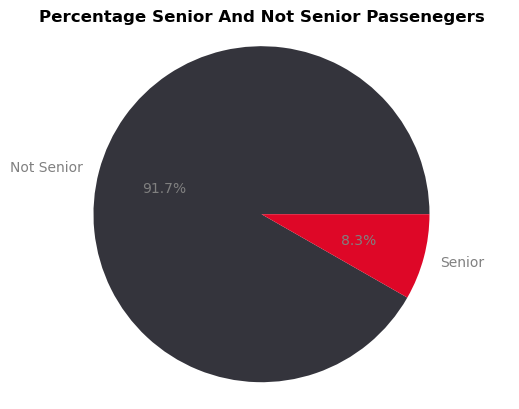

In [57]:
# Visualing the percentages senior and younger passengers
df['is_senior'].value_counts().plot(kind='pie', labels=['Not Senior', 'Senior'], colors=colors, autopct='%.1f%%', textprops={'color':'grey'})
plt.title('Percentage Senior And Not Senior Passenegers', weight='bold')
plt.ylabel('')
plt.axis('equal')
plt.show()

In [58]:
df.to_csv('cleaned_titanic_df.txt')